In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [3]:
train_data_mean = np.mean(x_train)
train_data_stdev = np.std(x_train)

In [4]:
train_data = ((x_train - train_data_mean) / train_data_stdev)
test_data = ((x_test - train_data_mean) / train_data_stdev)

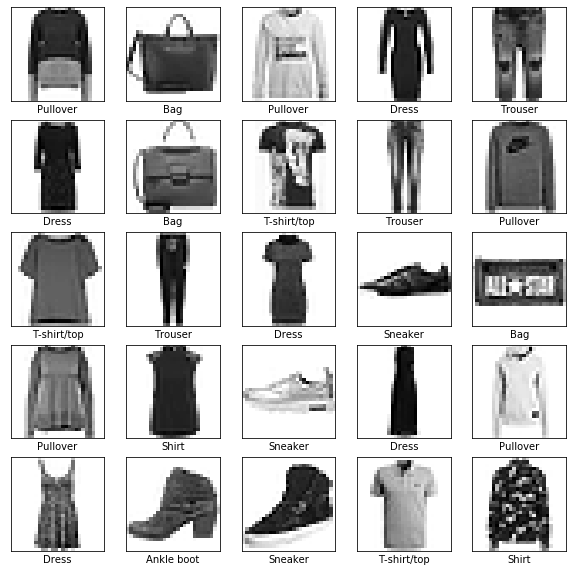

In [5]:
# train_images, train_labels = train_data
# test_images, test_labels = test_data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    rand_image_idx = np.random.randint(0, y_train.shape[0])
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[rand_image_idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[rand_image_idx]])
plt.show()

In [6]:
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
# model1 = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=64, kernel_size=2, padding='same', activation='relu', 
#                            kernel_initializer=tf.keras.initializers.he_normal(), name='Conv1'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
#                           kernel_initializer=tf.keras.initializers.he_normal()),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# model1.summary()
# model1 = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=64, kernel_size=2, padding='same', activation='relu', 
#                            kernel_initializer=tf.contrib.layers.xavier_initializer(), name='Conv1'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', 
#                           kernel_initializer=tf.contrib.layers.xavier_initializer()),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# model1.summary()
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=64, kernel_size=2, padding='same', 
                           kernel_initializer=tf.contrib.layers.xavier_initializer(),
                           activity_regularizer=tf.keras.regularizers.l2(10e-5), name='Conv1_1'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=64, kernel_size=2, padding='same', 
                           kernel_initializer=tf.contrib.layers.xavier_initializer(),
                           activity_regularizer=tf.keras.regularizers.l2(10e-5), name='Conv1_2'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=64, kernel_size=2, padding='same', 
                           kernel_initializer=tf.contrib.layers.xavier_initializer(),
                           activity_regularizer=tf.keras.regularizers.l2(10e-5), name='Conv2_1'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=64, kernel_size=2, padding='same', 
                           kernel_initializer=tf.contrib.layers.xavier_initializer(),
                           activity_regularizer=tf.keras.regularizers.l2(10e-5), name='Conv2_2'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.ReLU(),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_1 (Conv2D)             (None, 28, 28, 64)        320       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 64)        0         
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 28, 28, 64)        16448     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 14, 14, 64)        16448     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 14, 14, 64)        0         
__________

In [8]:
epochs = 10
model1.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model1.fit(x=x_train, y=y_train, epochs=epochs, batch_size=64, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 6s 104us/sample - loss: 9.7452 - acc: 0.3894 - val_loss: 7.0850 - val_acc: 0.5556
Epoch 2/10
55000/55000 [==============================] - 5s 83us/sample - loss: 5.5643 - acc: 0.6405 - val_loss: 3.0270 - val_acc: 0.7366
Epoch 3/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.8339 - acc: 0.7583 - val_loss: 0.4288 - val_acc: 0.8496
Epoch 4/10
55000/55000 [==============================] - 4s 82us/sample - loss: 0.4933 - acc: 0.8193 - val_loss: 0.3772 - val_acc: 0.8578
Epoch 5/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4429 - acc: 0.8357 - val_loss: 0.3439 - val_acc: 0.8758
Epoch 6/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4098 - acc: 0.8479 - val_loss: 0.3122 - val_acc: 0.8882
Epoch 7/10
55000/55000 [==============================] - 4s 80us/sa